In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from transformer import TimeSeriesTransformer
from inference import inference
from trainer import train_model
from dataset import CustomDataset, BatchSampler
from psd import get_average_spectrum

### Lorenz-63

In [2]:
input_dim = 3
d_model = 16
nhead = 16
num_encoder_layers = 3
num_decoder_layers = 3
dim_feedforward = 64
dropout = 0.1
output_dim = 3
input_length = 200
output_length = 10
batch_size = 512
num_epochs = 5000

In [2]:
train_data = np.load('./data/lorenz63_on0.05_train.npy')
dataset = CustomDataset(train_data, input_length=input_length, output_length=output_length)
data_loader = BatchSampler(dataset, batch_size)

model = TimeSeriesTransformer(input_dim, d_model, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward, dropout, output_dim)
loss = train_model(model, data_loader, num_epochs, d_model)

Epochs: 100%|██████████| 5000/5000 [30:44<00:00,  2.71it/s, Loss=0.002891]


In [3]:
test_data = np.load('./data/lorenz63_test.npy')
output_steps = 500
dataset = CustomDataset(test_data, input_length=input_length, output_length=output_steps)
data_loader = BatchSampler(dataset, 1000)
x, y = data_loader()

model = TimeSeriesTransformer(input_dim, d_model, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward, dropout, output_dim)
model.load_state_dict(torch.load(f'./model63.pth', weights_only=True))
pred = inference(model, x, input_length=input_length, output_length=output_length, output_steps=output_steps)

In [4]:
true_data = y[:, 1:, :].numpy()
pred_data = pred[:, input_length:, :]

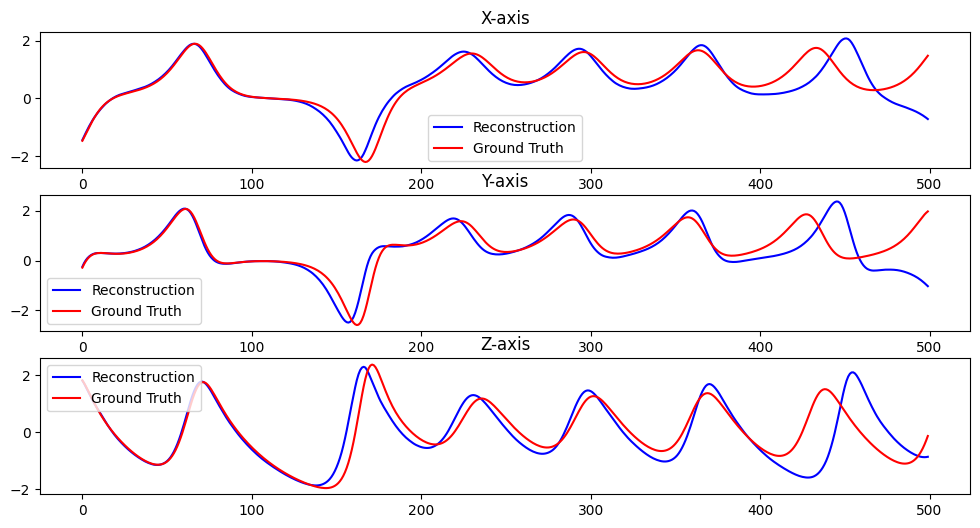

In [15]:
fig, axes = plt.subplots(3, figsize=(12,6))
ylabel = ['X', 'Y', 'Z']
idx = 100
for i in range(3):
    axes[i].plot(pred_data[idx, :, i], c='b', label='Reconstruction')
    axes[i].plot(true_data[idx, :, i], c='r', label='Ground Truth')
    axes[i].set_title(ylabel[i]+'-axis')
    axes[i].legend()

Text(0.5, 1.0, 'Ground Truth Powerspectra')

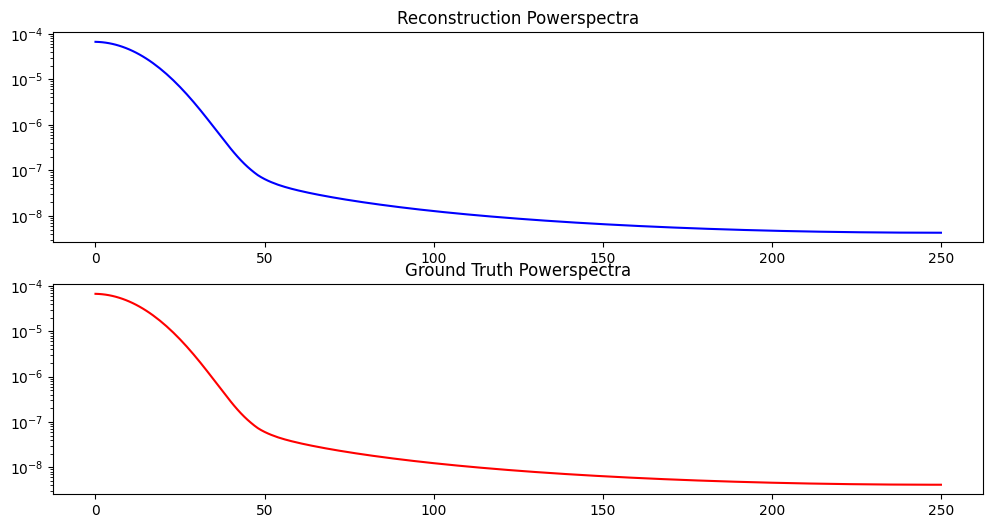

In [6]:
sigma = 10

fig, axes = plt.subplots(2, figsize=(12, 6))
axes[0].plot(np.array([get_average_spectrum(pred_data[:, :, dim], sigma) for dim in range(3)]).mean(0).mean(0), c='b')
axes[1].plot(np.array([get_average_spectrum(true_data[:, :, dim], sigma) for dim in range(3)]).mean(0).mean(0), c='r')
axes[0].set_yscale("log")
axes[1].set_yscale("log")
axes[0].set_title('Reconstruction Powerspectra')
axes[1].set_title('Ground Truth Powerspectra')

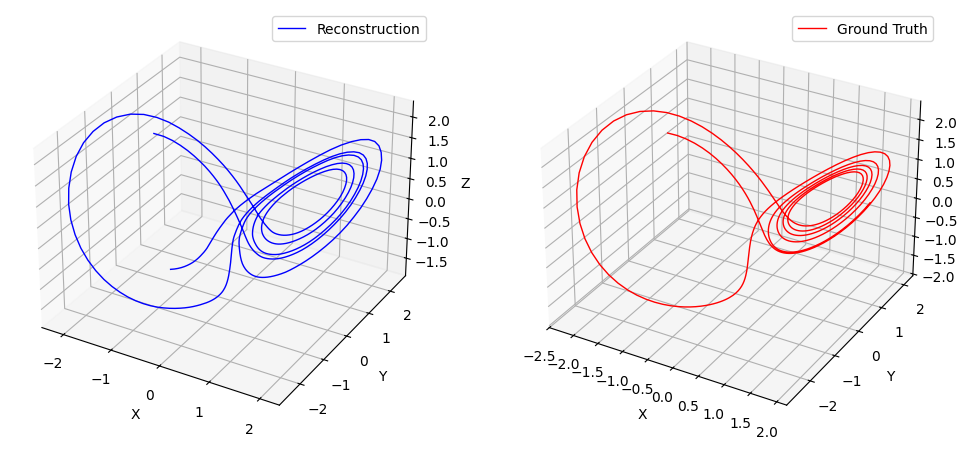

In [16]:
fig = plt.figure(figsize=(12, 6))

idx = 100

ax = fig.add_subplot(121, projection='3d')
ax.plot(pred_data[idx, :, 0], pred_data[idx, :, 1], pred_data[idx, :, 2], label='Reconstruction', c='b', linewidth=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

ax = fig.add_subplot(122, projection='3d')
ax.plot(true_data[idx, :, 0], true_data[idx, :, 1], true_data[idx, :, 2], label='Ground Truth', c='r', linewidth=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

### Lorenz-96

In [17]:
input_dim = 20
d_model = 256
nhead = 8
num_encoder_layers = 8
num_decoder_layers = 8
dim_feedforward = 1024
dropout = 0.1
output_dim = 20
input_length = 80
output_length = 10
batch_size = 512
num_epochs = 5000

In [ ]:
train_data = np.load('./data/lorenz96_on0.05_train.npy')
dataset = CustomDataset(train_data, input_length=input_length, output_length=output_length)
data_loader = BatchSampler(dataset, batch_size)

model = TimeSeriesTransformer(input_dim, d_model, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward, dropout, output_dim)
loss = train_model(model, data_loader, num_epochs, d_model)

In [27]:
test_data = np.load('./data/lorenz96_test.npy')
output_steps = 500
dataset = CustomDataset(test_data, input_length=input_length, output_length=output_steps)
data_loader = BatchSampler(dataset, 1000)
x, y = data_loader()

model = TimeSeriesTransformer(input_dim, d_model, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward, dropout, output_dim)
model.load_state_dict(torch.load(f'./model96.pth', weights_only=True, map_location=torch.device('mps')))
pred = inference(model, x, input_length=input_length, output_length=output_length, output_steps=output_steps)

In [28]:
true_data = y[:, 1:, :].numpy()
pred_data = pred[:, input_length:, :]

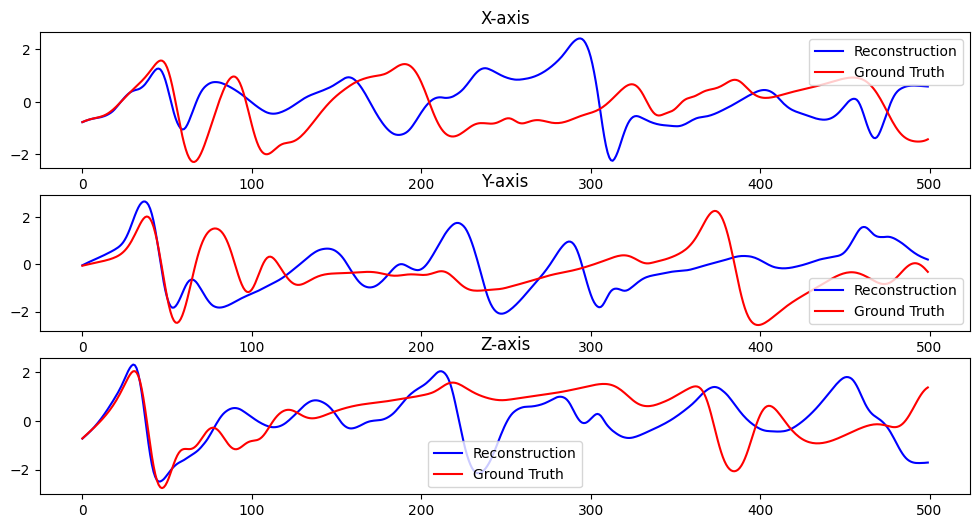

In [41]:
fig, axes = plt.subplots(3, figsize=(12,6))
ylabel = ['X', 'Y', 'Z']
idx = 200
for i in range(3):
    axes[i].plot(pred_data[idx, :, i], c='b', label='Reconstruction')
    axes[i].plot(true_data[idx, :, i], c='r', label='Ground Truth')
    axes[i].set_title(ylabel[i]+'-axis')
    axes[i].legend()

Text(0.5, 1.0, 'Ground Truth Powerspectra')

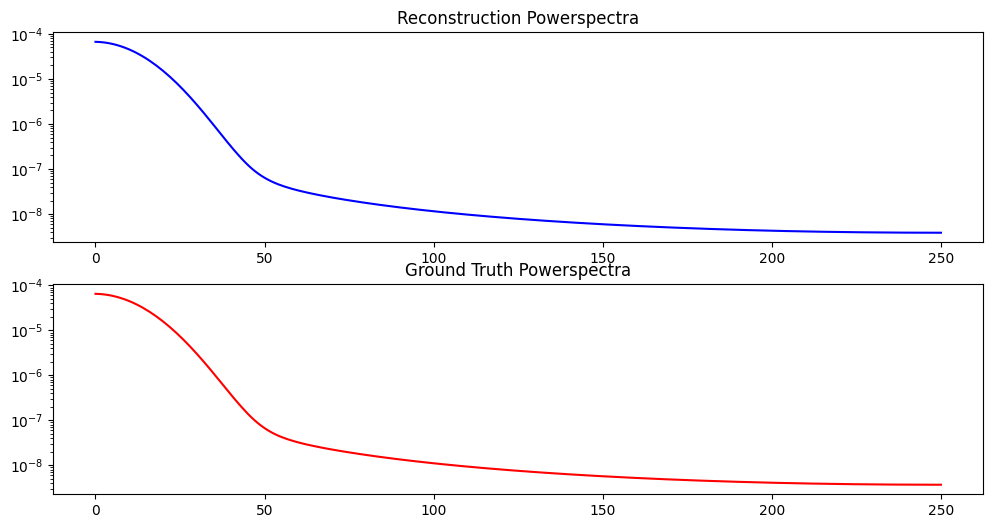

In [30]:
sigma = 10

fig, axes = plt.subplots(2, figsize=(12, 6))
axes[0].plot(np.array([get_average_spectrum(pred_data[:, :, dim], sigma) for dim in range(3)]).mean(0).mean(0), c='b')
axes[1].plot(np.array([get_average_spectrum(true_data[:, :, dim], sigma) for dim in range(3)]).mean(0).mean(0), c='r')
axes[0].set_yscale("log")
axes[1].set_yscale("log")
axes[0].set_title('Reconstruction Powerspectra')
axes[1].set_title('Ground Truth Powerspectra')

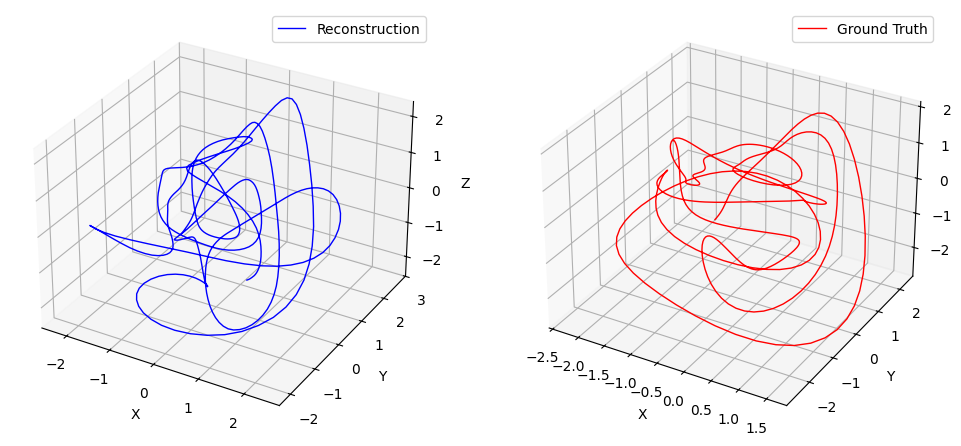

In [44]:
fig = plt.figure(figsize=(12, 6))

idx = 200

ax = fig.add_subplot(121, projection='3d')
ax.plot(pred_data[idx, :, 0], pred_data[idx, :, 1], pred_data[idx, :, 2], label='Reconstruction', c='b', linewidth=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

ax = fig.add_subplot(122, projection='3d')
ax.plot(true_data[idx, :, 0], true_data[idx, :, 1], true_data[idx, :, 2], label='Ground Truth', c='r', linewidth=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()